# Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import time
import random
import math
from IPython.display import clear_output

# Importing own code

In [2]:
from generateSpace import *
from plotLattice import *
from potentialEnergy import *
from numberOfCalculations import *
from makeRandomDatabase import *

## Auxiliarycode

In [3]:
def return1(lengths):
    return 1

def predictedCalculationTime(numberOfSurroundingCells, numberOfParticlesPerCell = 4, timePerTriangle = 15*(10**-6)):
    
    return timePerTriangle * numberOfCalculationsGeneration(numberOfSurroundingCells, numberOfParticlesPerCell)

predictedCalculationTime(4, 4)

3.0912599999999997

# Testing

## Testing functionality

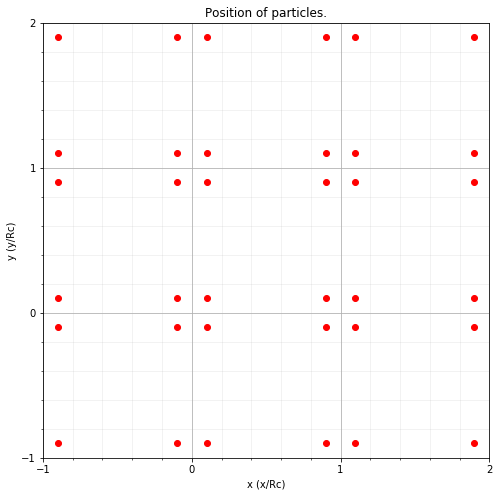

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b11a4f81c8>)

In [4]:
atoms = [np.array([0.1, 0.1]), np.array([0.9, 0.1]), np.array([0.1, 0.9]), np.array([0.9, 0.9])]

totalSpace = generateSpace(atoms, 1, 1.0, False)
plotLattice(totalSpace, 1)

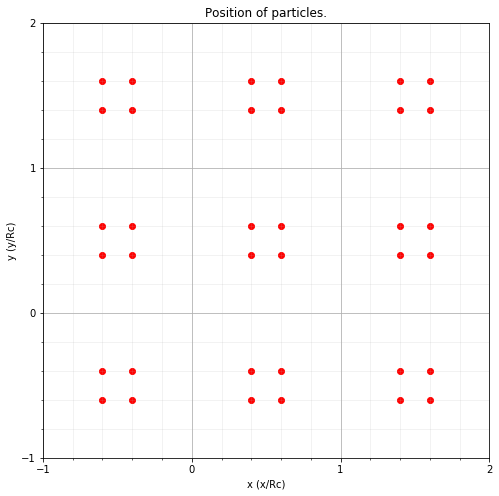

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b11a76e788>)

In [5]:
atoms = [np.array([0.4, 0.4]), np.array([0.6, 0.4]), np.array([0.4, 0.6]), np.array([0.6, 0.6])]

totalSpace = generateSpace(atoms, 1, 1.0, False)
plotLattice(totalSpace, 1)

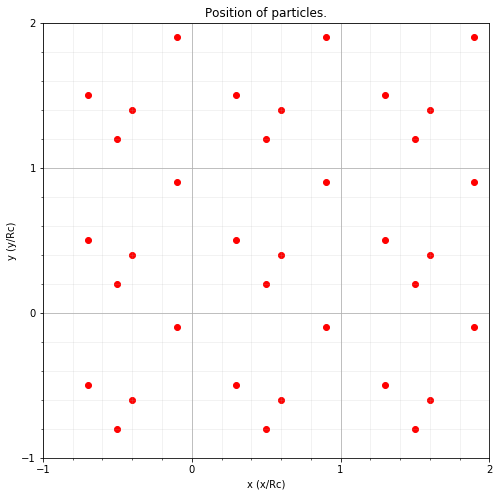

41108388.953676626

In [6]:
atoms = [np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4]), np.array([0.5, 0.2])]

totalSpace = generateSpace(atoms, 1, 1.0, False)
plotLattice(totalSpace, 1)

otherSpace = generateSpace(atoms, 1, 1.0)

potentialEnergy(otherSpace, atoms, potentialEnergyPerSet)

In [7]:
print(numberOfCalculationsGeneration(4, len(atoms)))
print(potentialEnergy(generateSpace(atoms, 4, 1.0), atoms, return1))# Results from wolfram are 206084 for partial or 5616324 for full

206084.0
309461.0


## Testing quality of potential energy particle

In [8]:
def potentialEnergyPerTrioExperimental(lengths, E0=1, Rc=1):
    """
    """
    n = 6
    R = 2 * Rc
    
    #a = Mc * lengths[0] / (3 * Rc)
    #b = Mc * lengths[1] / (3 * Rc)
    #c = Mc * lengths[2] / (3 * Rc)
    
    semiCircumference = np.mean([length / Rc for length in lengths])#a + b + c
    #s = (a + b + c) / 2
    #area2Triangle = s * (s - a) * (s - b) * (s - c)
    
    if semiCircumference >= R:
        return 0.0
    else:
        longRangePotential = -2 * (1 / (semiCircumference**n) - 1 / (R**n))
        shortRangePotential = (1 / (semiCircumference**(2 * n)) - 1 / (R**(2 * n)))
        correction = -(2 * n / (R**(n + 1))) * (1 - 1/(R**n)) * (semiCircumference - R)
        
        return E0 * (shortRangePotential + longRangePotential + correction)


-0.8767684170331265
0.0


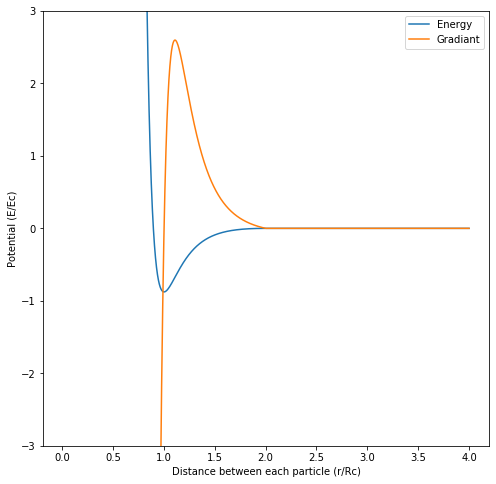

In [9]:
yCoordinates = np.linspace(0.01, 4, 10000, endpoint=True)

results =[]

for yCoordinate in yCoordinates:
    results.append(potentialEnergyPerTrioExperimental([yCoordinate, yCoordinate, yCoordinate]))

fig, ax = plt.subplots(figsize=(8, 8))
plt.ylim(-3, 3)
ax.plot(yCoordinates, results)
ax.plot(yCoordinates, np.gradient(results, yCoordinates[1] - yCoordinates[0]))
plt.legend(['Energy', 'Gradiant'])
ax.set_xlabel('Distance between each particle (r/Rc)')
ax.set_ylabel('Potential (E/Ec)')
print(min(results))
print(potentialEnergyPerTrioExperimental([max(yCoordinates), max(yCoordinates), max(yCoordinates)]))


-0.8767684170331265
0.0


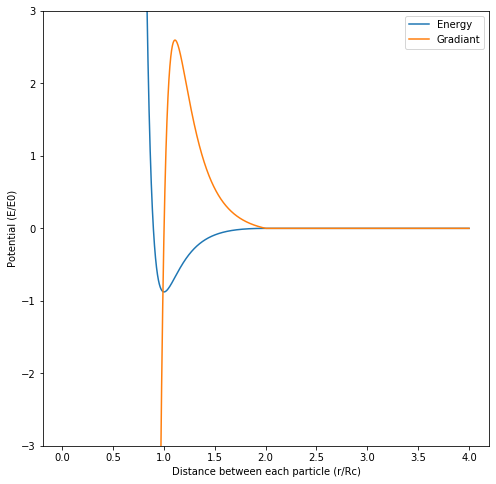

In [10]:
yCoordinates = np.linspace(0.01, 4, 10000, endpoint=True)

results =[]

for yCoordinate in yCoordinates:
    results.append(potentialEnergyPerTrioExperimental([yCoordinate]))

fig, ax = plt.subplots(figsize=(8, 8))
plt.ylim(-3, 3)
ax.plot(yCoordinates, results)
ax.plot(yCoordinates, np.gradient(results, yCoordinates[1] - yCoordinates[0]))
plt.legend(['Energy', 'Gradiant'])
ax.set_xlabel('Distance between each particle (r/Rc)')
ax.set_ylabel('Potential (E/E0)')
print(min(results))
print(potentialEnergyPerTrioExperimental([max(yCoordinates), max(yCoordinates), max(yCoordinates)]))


-5.260480488089843
0.0


Text(0, 0.5, 'y')

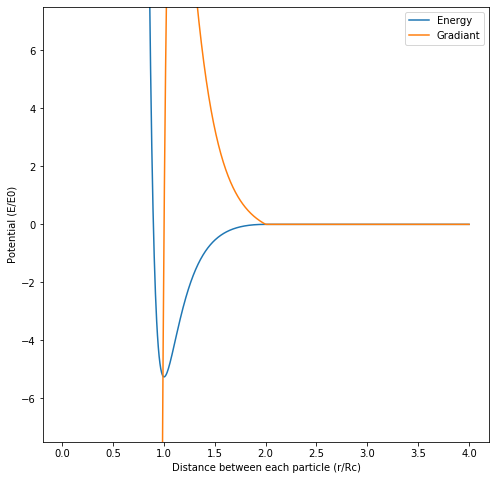

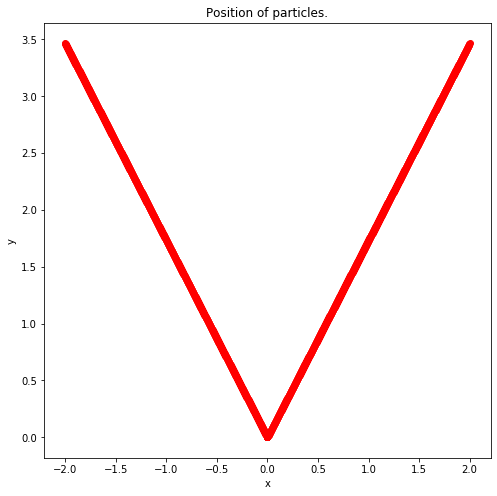

In [11]:
widthOfCell = 100
yCoordinates = np.linspace(0.01, 4, 1000, endpoint=True)

results =[]
totalParticles =[]

for yCoordinate in yCoordinates:
    particles = [np.array([0, 0]), np.array([yCoordinate/2, np.sqrt(3)*yCoordinate/2]), np.array([-yCoordinate/2, np.sqrt(3)*yCoordinate/2])]
    [totalParticles.append(i) for i in particles]
    otherSpace = generateSpace(particles, 1, widthOfCell)
    results.append(potentialEnergy(otherSpace, particles, potentialEnergyPerTrioExperimental))

fig, ax = plt.subplots(figsize=(8, 8))
plt.ylim(-7.5, 7.5)
ax.plot(yCoordinates, np.array(results))#*(1/5.210870606605143)
ax.plot(yCoordinates, np.gradient(np.array(results), yCoordinates[1] - yCoordinates[0]))
plt.legend(['Energy', 'Gradiant'])
ax.set_xlabel('Distance between each particle (r/Rc)')
ax.set_ylabel('Potential (E/E0)')
print(min(results))
print(potentialEnergyPerTrioExperimental([max(yCoordinates), max(yCoordinates), max(yCoordinates)]))

fig, ax2 = plt.subplots(figsize=(8, 8))
toPlot = [[totalParticles[j][i] for j in range(len(totalParticles))] for i in range(len(totalParticles[0]))]
ax2.scatter(x=toPlot[0], y=toPlot[1], marker='o', c='r')
ax2.set_title('Position of particles.')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

1979.7672693347622
0.0


Text(0, 0.5, 'y')

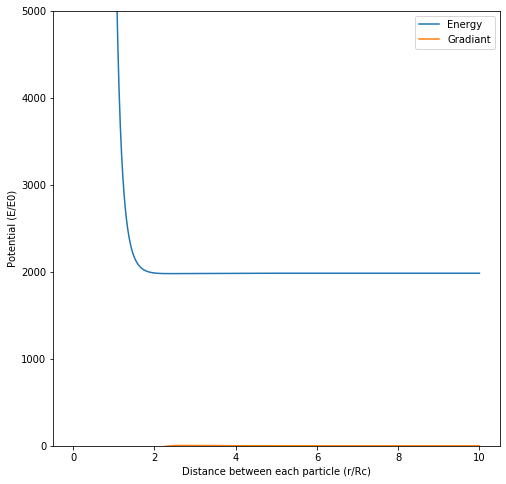

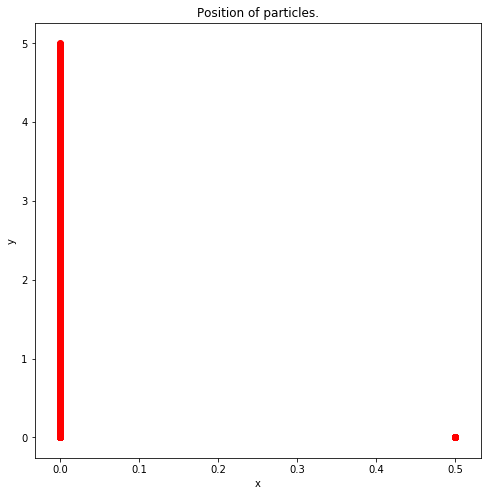

In [12]:
widthOfCell = 100
yCoordinates = np.linspace(0.01, 10, 1000, endpoint=True)

results =[]
totalParticles =[]

for yCoordinate in yCoordinates:
    particles = [np.array([0, 0]), np.array([0.5, 0]), np.array([0, yCoordinate/2])]
    [totalParticles.append(i) for i in particles]
    otherSpace = generateSpace(particles, 1, widthOfCell)
    results.append(potentialEnergy(otherSpace, particles, potentialEnergyPerTrioExperimental))

fig, ax = plt.subplots(figsize=(8, 8))
plt.ylim(0, 5000)
ax.plot(yCoordinates, np.array(results))#*(1/5.210870606605143)
ax.plot(yCoordinates, np.gradient(np.array(results), yCoordinates[1] - yCoordinates[0]))
plt.legend(['Energy', 'Gradiant'])
ax.set_xlabel('Distance between each particle (r/Rc)')
ax.set_ylabel('Potential (E/E0)')
print(min(results))
print(potentialEnergyPerTrioExperimental([max(yCoordinates), max(yCoordinates), max(yCoordinates)]))

fig, ax2 = plt.subplots(figsize=(8, 8))
toPlot = [[totalParticles[j][i] for j in range(len(totalParticles))] for i in range(len(totalParticles[0]))]
ax2.scatter(x=toPlot[0], y=toPlot[1], marker='o', c='r')
ax2.set_title('Position of particles.')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

-16.035565835460492
8.160122234582015


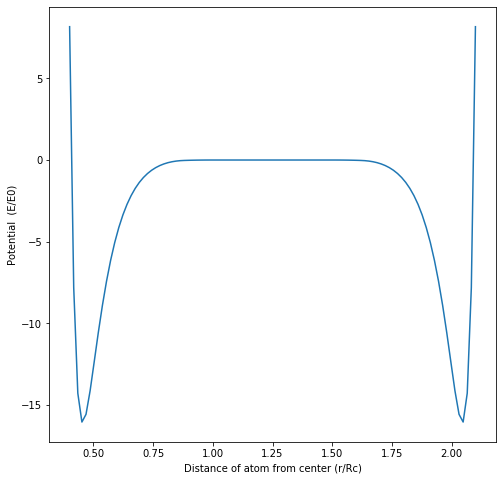

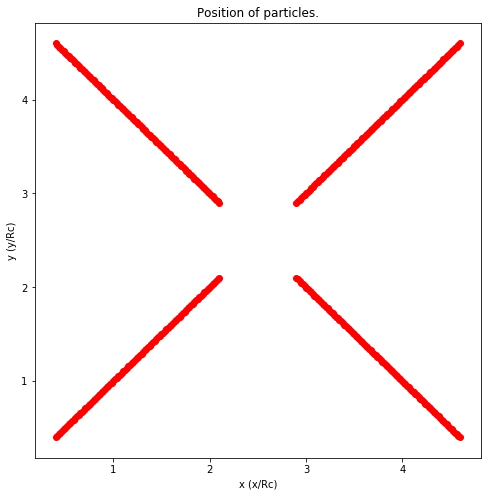

In [13]:
widthOfCell = 5
yCoordinates = np.linspace(0.16*widthOfCell/2, 0.84*widthOfCell/2, 100, endpoint=True)

results =[]
totalParticles =[]

for yCoordinate in yCoordinates:
    particles = [np.array([widthOfCell / 2 + yCoordinate, widthOfCell / 2 + yCoordinate]), np.array([widthOfCell / 2 + yCoordinate, widthOfCell / 2 - yCoordinate]), np.array([widthOfCell / 2 - yCoordinate, widthOfCell / 2 + yCoordinate]), np.array([widthOfCell / 2 - yCoordinate, widthOfCell / 2 - yCoordinate])]
    [totalParticles.append(i) for i in particles]
    otherSpace = generateSpace(particles, 2, widthOfCell)
    results.append(potentialEnergy(otherSpace, particles, potentialEnergyPerTrioExperimental))

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(yCoordinates, results)
#ax.plot(yCoordinates, np.gradient(results, yCoordinates[1] - yCoordinates[0]))
#plt.legend(['Energy', 'Gradiant'])
ax.set_xlabel('Distance of atom from center (r/Rc)')
ax.set_ylabel('Potential  (E/E0)')

fig, ax2 = plt.subplots(figsize=(8, 8))
toPlot = [[totalParticles[j][i] for j in range(len(totalParticles))] for i in range(len(totalParticles[0]))]
ax2.scatter(x=toPlot[0], y=toPlot[1], marker='o', c='r')
ax2.set_title('Position of particles.')
ax2.set_xlabel('x (x/Rc)')
ax2.set_ylabel('y (y/Rc)')

print(min(results))
print(max(results))

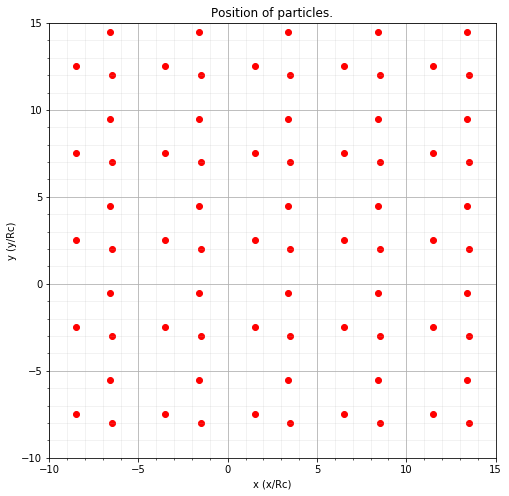

-1.6553317556248426
1


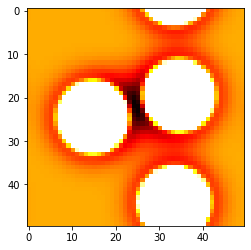

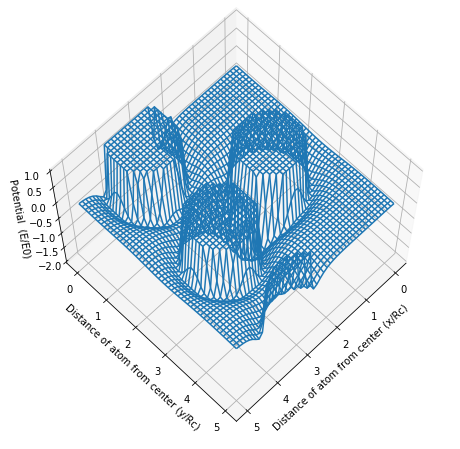

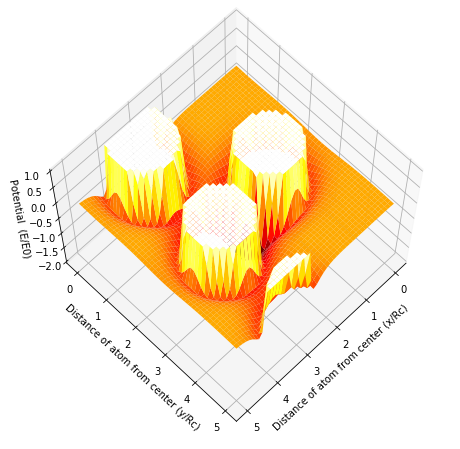

In [14]:
widthOfCell = 5
xCoordinates = np.linspace(-0*widthOfCell, 1*widthOfCell, 50, endpoint=True)
yCoordinates = np.linspace(-0*widthOfCell, 1*widthOfCell, 50, endpoint=True)


plotLattice(generateSpace([np.array([0.3*widthOfCell, 0.5*widthOfCell]), np.array([0.68*widthOfCell, 0.9*widthOfCell]), np.array([0.7*widthOfCell, 0.4*widthOfCell])],2, 5, False), 5)

xResults = []
yResults = []
results =[]

for yCoordinate in yCoordinates:
    x = []
    y = []
    z =[]
    for xCoordinate in xCoordinates:
        #print("Calculating x:", str(xCoordinate) + ',y:', yCoordinate)
        particles = [np.array([0.3*widthOfCell, 0.5*widthOfCell]), np.array([0.68*widthOfCell, 0.9*widthOfCell]), np.array([0.7*widthOfCell, 0.4*widthOfCell]), np.array([xCoordinate, yCoordinate])]
        otherSpace = generateSpace(particles, 1, widthOfCell)
        x.append(xCoordinate)
        y.append(widthOfCell - yCoordinate)
        try:
            z.append(potentialEnergy(otherSpace, particles, potentialEnergyPerTrioExperimental))
        except:
            z.append(100000)
            print("Error at x:", str(xCoordinate) + ',y:', yCoordinate)
    xResults.append(x)
    yResults.append(y)
    results.append([min(i, 1) for i in z])
    #results.append(z)

#print(results)
print(min([min(result) for result in results]))
print(max([max(result) for result in results]))

plt.imshow(results, cmap='hot', interpolation='nearest')


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(xResults, yResults, np.array(results))#np.array([[min(result, 0.1) for result in resultPart] for resultPart in results]))
ax.set_xlabel('Distance of atom from center (x/Rc)')
ax.set_ylabel('Distance of atom from center (y/Rc)')
ax.set_zlabel('Potential  (E/E0)')
ax.set_zlim(-2, 1)
ax.view_init(67.5, 45)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xResults, yResults, np.array(results), cmap='hot')
ax.set_xlabel('Distance of atom from center (x/Rc)')
ax.set_ylabel('Distance of atom from center (y/Rc)')
ax.set_zlabel('Potential  (E/E0)')
ax.set_zlim(-2, 1)
ax.view_init(67.5, 45)

## Checking convergence

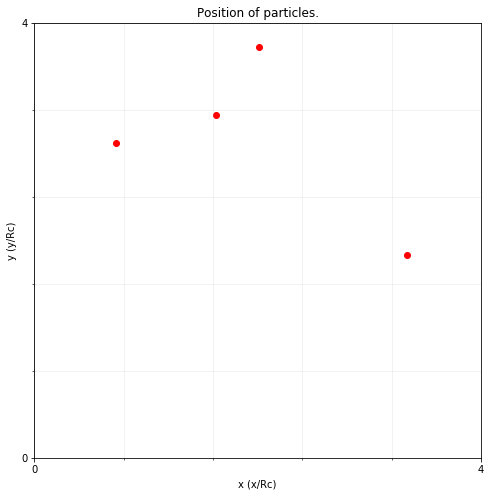

Calculating with 0 surrounding cells.
0.002000093460083008 2.4277345646685564
Calculating with 1 surrounding cells.
0.16603803634643555 2.416383435263286
Calculating with 2 surrounding cells.
1.1769840717315674 2.416383435263286
Calculating with 3 surrounding cells.
4.494117259979248 2.416383435263286
Calculating with 4 surrounding cells.
12.354203462600708 2.416383435263286
Calculating with 5 surrounding cells.
27.80497670173645 2.416383435263286


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

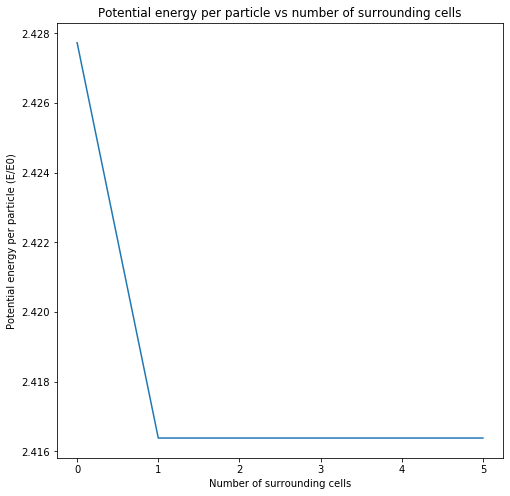

In [15]:
numberOfSurroundingCells = [i for i in range(0,6)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 4.0

atoms = [np.array([random.uniform(0, widthOfCell), random.uniform(0, widthOfCell)]) for j in range(0, 4)]

plotLattice(atoms, widthOfCell)

for i in numberOfSurroundingCells:
    print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    print((timeEnd - timeStart), potentialEnergyResults[i])
    timeForCalculation.append((timeEnd - timeStart))

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle (E/E0)')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
10255277.5902525
10277097.238419157
10276970.307149475
10276968.111222722
10276968.111222722
10276968.111222722
10276968.111222722
10276968.111222722
10276968.111222722


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

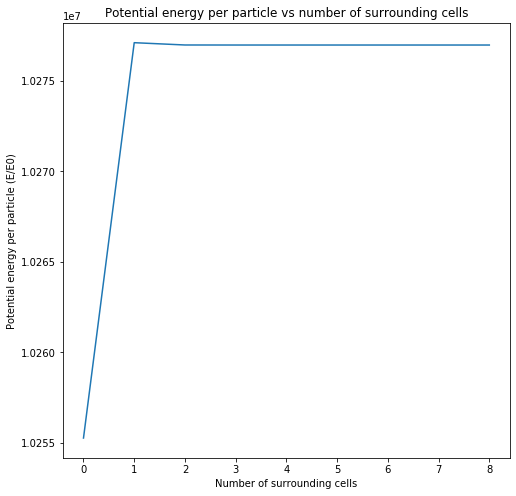

In [16]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 1.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle (E/E0)')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
2417.146657056235
2408.159457013577
2408.1518218876417
2408.1518218876417
2408.1518218876417
2408.1518218876417
2408.1518218876417
2408.1518218876417
2408.1518218876417


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

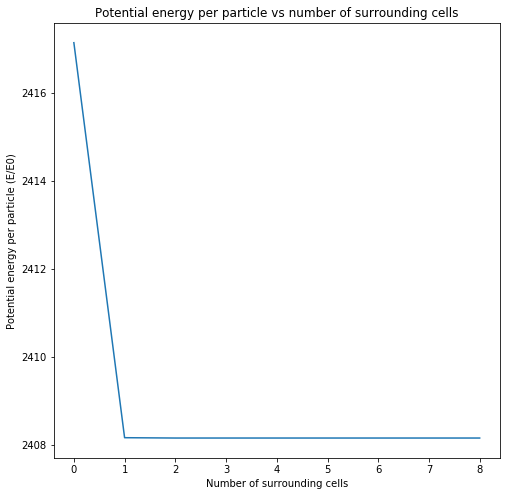

In [17]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 2.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle (E/E0)')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
-0.5601304968535835
-0.5717078550124207
-0.5717078550124207
-0.5717078550124207
-0.5717078550124207
-0.5717078550124207
-0.5717078550124207
-0.5717078550124207
-0.5717078550124207


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

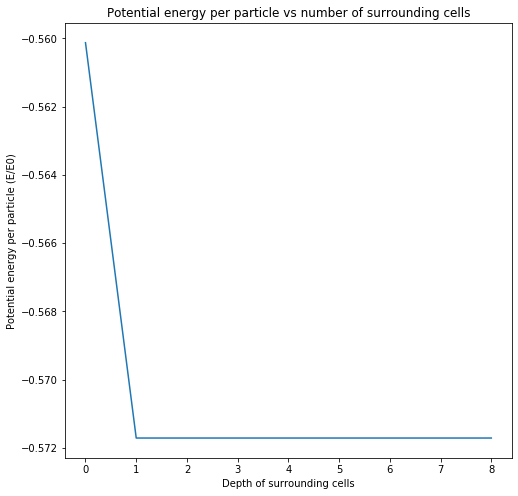

In [18]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 4.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Depth of surrounding cells')
ax.set_ylabel('Potential energy per particle (E/E0)')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
-0.0012015459939670242
-0.0012015459939670242
-0.0012015459939670242
-0.0012015459939670242
-0.0012015459939670242
-0.0012015459939670242
-0.0012015459939670242
-0.0012015459939670242
-0.0012015459939670242


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

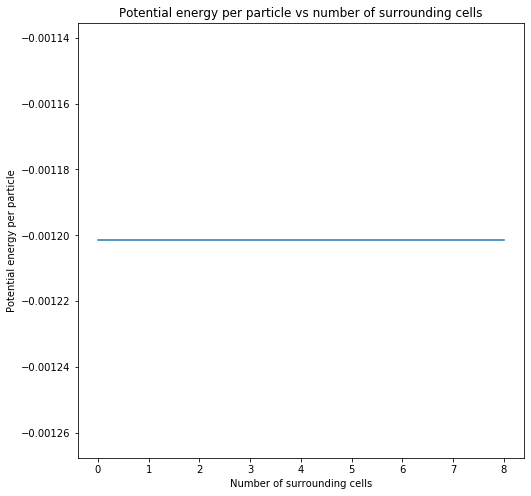

In [19]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 8.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

## Testing and predicting fucntion speed

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.0, 8.638381958007812e-05, 0.0002464604377746582, 0.0004617400169372559, 0.000776207447052002, 0.001149294376373291, 0.0016463756561279296, 0.002196648120880127, 0.0028812499046325683, 0.0034906911849975587, 0.004359134197235107]


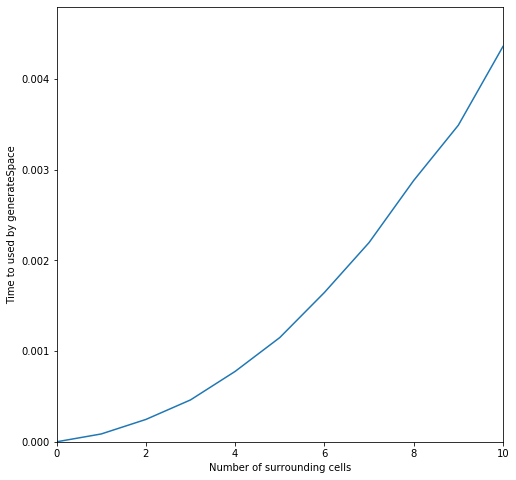

In [13]:
numberOfMeasurements = 500

xVariable = [i for i in range(0, 11)]
yVariable =[]

for i in xVariable:
    timeStart = time.time()
    [generateSpace(atoms, i, 1.0) for j in range(numberOfMeasurements)]
    timeEnd = time.time()
    yVariable.append((timeEnd - timeStart)/numberOfMeasurements)
    
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(xVariable, yVariable)
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time to used by generateSpace')
ax.set_xlim([min(xVariable), max(xVariable)])
ax.set_ylim([0, 1.1 * max(yVariable)])

print(xVariable)
print(yVariable)

In [14]:
%timeit potentialEnergyPerTrioExperimental(getLengths([np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4])]))

40.8 µs ± 166 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
%timeit potentialEnergyPerTrioExperimental(getLengths([np.array([0.3, 0.5]), np.array([0.9, 0.9])]))

31.3 µs ± 111 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Calculating with 0 surrounding cells.
0.0013336340586344402
Calculating with 1 surrounding cells.
0.16163150469462076
Calculating with 2 surrounding cells.
1.213356653849284
Calculating with 3 surrounding cells.
4.5840803782145185
Calculating with 4 surrounding cells.
12.618322928746542
Calculating with 5 surrounding cells.
27.965307871500652
Calculating with 6 surrounding cells.
54.75998640060425
Calculating with 7 surrounding cells.
97.01042238871257
Calculating with 8 surrounding cells.
160.67610804239908
Calculating with 9 surrounding cells.
250.95211656888327
Calculating with 10 surrounding cells.
371.9665018717448

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.0013336340586344402, 0.16163150469462076, 1.213356653849284, 4.5840803782145185, 12.618322928746542, 27.965307871500652, 54.75998640060425, 97.01042238871257, 160.67610804239908, 250.95211656888327, 371.9665018717448]
[0.00132, 0.17923999999999998, 1.5181199999999997, 5.984039999999999, 16.52612, 37.076519999999995, 72.55044, 128.8

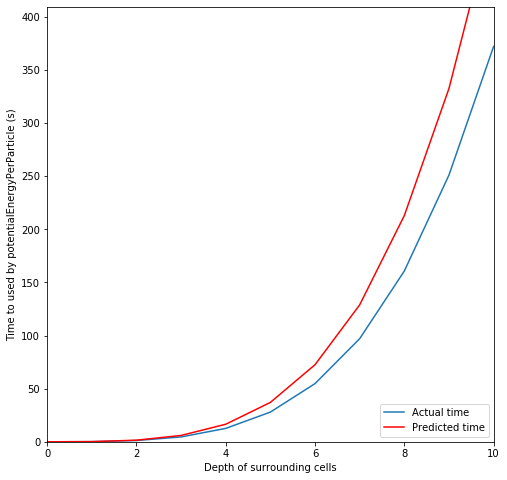

In [17]:
numberOfMeasurements = 3

atoms = [np.array([random.uniform(0, 5.0), random.uniform(0, 5.0)]) for j in range(0, 4)]

xVariable = [i for i in range(0, 11)]
yVariable =[]

for i in xVariable:
    print('Calculating with ' + str(i) + ' surrounding cells.')
    space = generateSpace(atoms, i, 1.0)
    timeStart = time.time()
    [potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental) for j in range(numberOfMeasurements)]
    timeEnd = time.time()
    print((timeEnd - timeStart)/numberOfMeasurements)
    yVariable.append((timeEnd - timeStart)/numberOfMeasurements)

print('')
yVariablePredict = [calculationTime(len(atoms), i) for i in xVariable]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(xVariable, yVariable)
ax.plot(xVariable, yVariablePredict, c='r')
plt.legend(['Actual time', 'Predicted time' ], loc=4)
ax.set_xlabel('Depth of surrounding cells')
ax.set_ylabel('Time to used by potentialEnergyPerParticle (s)')
ax.set_xlim([min(xVariable), max(xVariable)])
ax.set_ylim([0, 1.1 * max(yVariable)])

print(xVariable)
print(yVariable)
print(yVariablePredict)

Calculating with 1 particles per cell.
0.2905724843343099
Calculating with 2 particles per cell.
0.042400757471720375
Calculating with 3 particles per cell.
0.24891376495361328
Calculating with 4 particles per cell.
0.6957404613494873
Calculating with 5 particles per cell.
1.5474901994069417
Calculating with 6 particles per cell.
2.83423121770223
Calculating with 7 particles per cell.
4.7140467166900635
Calculating with 8 particles per cell.
7.268582661946614
Calculating with 9 particles per cell.
10.580368280410767
Calculating with 10 particles per cell.
15.038937409718832
Calculating with 11 particles per cell.
20.266961177190144
Calculating with 12 particles per cell.
26.981369177500408
Calculating with 13 particles per cell.
34.78295143445333
Calculating with 14 particles per cell.
43.95162773132324
Calculating with 15 particles per cell.
55.09632706642151
Calculating with 16 particles per cell.
66.62177920341492
Calculating with 17 particles per cell.
80.30683573087056
Calculating

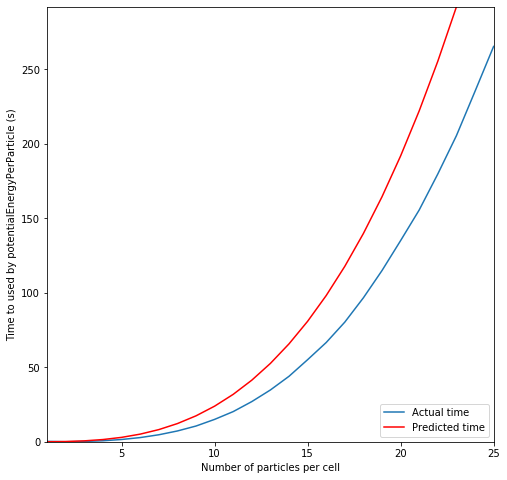

In [16]:
numberOfMeasurements = 3

Ds=2

xVariable = [i for i in range(1, 26)]
yVariable =[]

for i in xVariable:
    print('Calculating with ' + str(i) + ' particles per cell.')
    space = generateSpace(atoms, Ds, 1.0)
    atoms = [np.array([random.uniform(0, 5.0), random.uniform(0, 5.0)]) for j in range(0, i)]
    timeStart = time.time()
    [potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental) for j in range(numberOfMeasurements)]
    timeEnd = time.time()
    print((timeEnd - timeStart)/numberOfMeasurements)
    yVariable.append((timeEnd - timeStart)/numberOfMeasurements)

print('')
yVariablePredict = [calculationTime(i, Ds) for i in xVariable]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(xVariable, yVariable)
ax.plot(xVariable, yVariablePredict, c='r')
plt.legend(['Actual time', 'Predicted time' ], loc=4)
ax.set_xlabel('Number of particles per cell')
ax.set_ylabel('Time to used by potentialEnergyPerParticle (s)')
ax.set_xlim([min(xVariable), max(xVariable)])
ax.set_ylim([0, 1.1 * max(yVariable)])

print(xVariable)
print(yVariable)
print(yVariablePredict)

In [ ]:
from PyQuante.Molecule import Molecule
from PyQuante.dft import dft

def makeMolecule(Np, wc, name, distanceMeasure='Angstrom'):
    result = Molecule(name, [(1, (random.uniform(0, wc), random.uniform(0, wc), random.uniform(0, wc))) for i in range(Np)] ,distanceMeasure)
    
    return result

en, orbe, orbs = dft(makeMolecule(4, 1))